##### We will use Clustering based Recommendation Systems. This is used on Unlabelled dataset, for Unsupervised Learning.
##### It is used to group users or items with similar characterisitics and provide recommendations based on these clusters.
##### We will use K Means Clustering Algorithm in this project.

In [1]:
# Load dataset
import pandas as pd

df = pd.read_csv("data.csv")
df = df.sample(n = 5000, random_state = 42).reset_index(drop = True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [2]:
# Features and Scaling
from sklearn.preprocessing import StandardScaler

numerical_features = [
    'valence', 'danceability', 'energy', 'tempo', 'acousticness', 'liveness', 'speechiness', 'instrumentalness'
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns = numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,1.473178,2.032267,0.142150,0.310507,-0.005840,-0.783298,-0.107375,1.916073
1,0.226049,0.276101,-0.771789,-0.886487,1.126217,-0.446557,-0.133457,-0.171477
2,0.470135,1.941333,0.138480,-0.865614,-0.908852,-0.194001,1.737477,-0.536877
3,-1.249911,-0.417272,-0.716732,2.266056,1.144646,-0.536354,-0.387900,2.122604
4,-0.387981,0.634154,-1.404939,-1.477663,1.297342,-0.536354,0.010283,2.151200
...,...,...,...,...,...,...,...,...
4995,0.336651,-0.019435,0.810170,0.374302,-0.837769,-0.598090,-0.353124,-0.536877
4996,1.507503,1.009258,1.357065,-0.824128,-1.106567,0.434583,-0.270821,-0.536877
4997,-0.681647,-1.826752,-0.599278,-2.003804,0.999848,0.114678,-0.387900,-0.536835
4998,-0.906665,-0.815109,-1.495966,-0.516212,1.284178,-0.592478,-0.412243,-0.287769


In [3]:
# Split data into Train, Test and Split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size = 0.2, random_state = 42)

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\clust

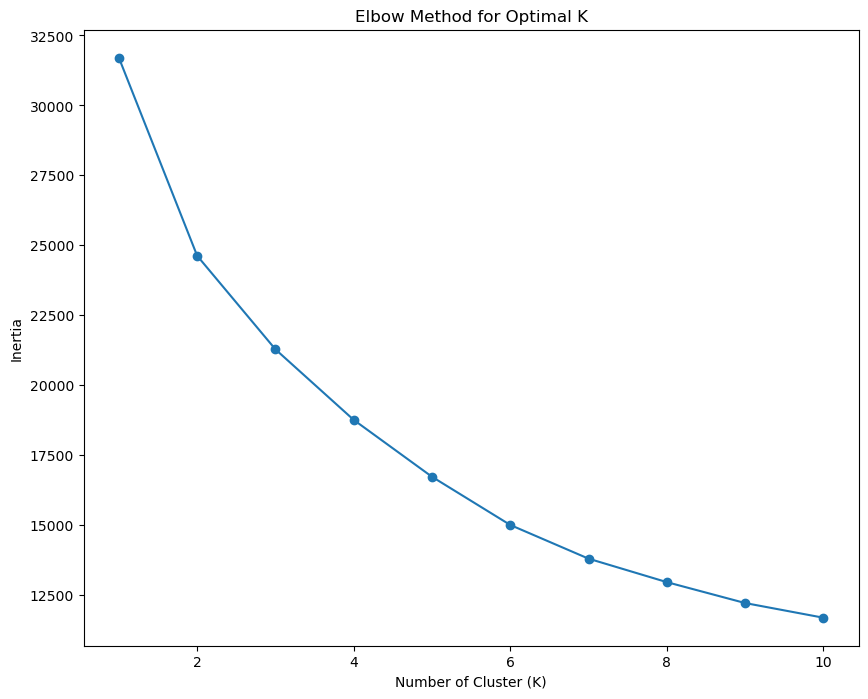

In [4]:
# Elbow Method Plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values :
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (10, 8))
plt.plot(k_values, inertia, marker = 'o')
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")

plt.show()

In [5]:
# Applying KMeans
optimal_k = 5
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805,2
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104,1
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744,2
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764,4
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,4


In [7]:
df['Cluster'].value_counts()

Cluster
2    1554
1    1309
3    1187
4     741
0     209
Name: count, dtype: int64

In [8]:
# Save the updated DataFrame to a new CSV file
df.to_csv("clustered_data.csv", index=False)

Text(0.5, 1.0, 'K Means Cluster')

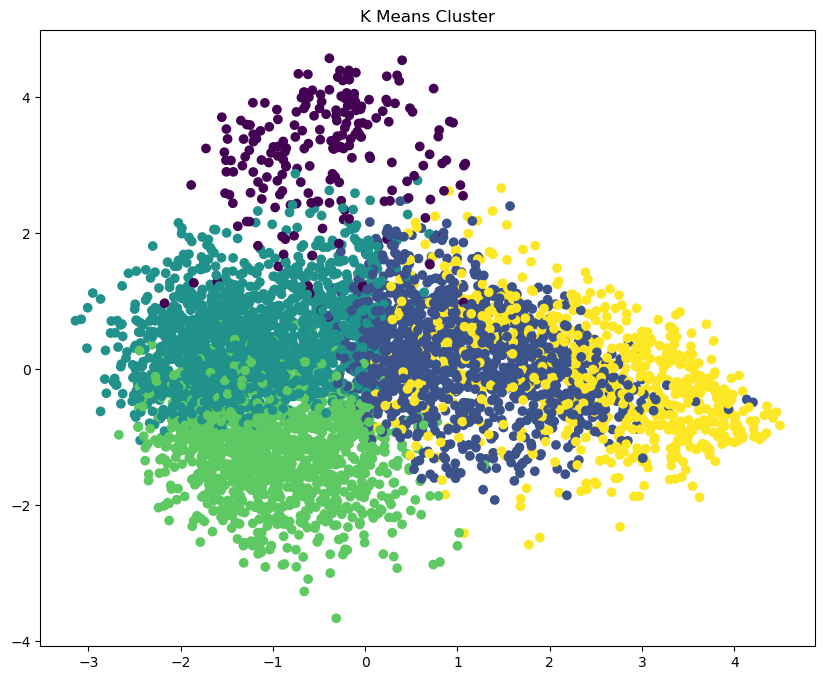

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize = (10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c = df["Cluster"], cmap = "viridis")
plt.title("K Means Cluster")

In [11]:
# Recommendation System
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations = 5) :
    # Get Cluster for Input song
    song_cluster = df[df['name'] == song_name]['Cluster'].values[0]

    # Filter all songs 
    same_cluster_songs = df[df['Cluster'] == song_cluster]

    # Calculate similarity within same cluster
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get Top Recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][['name', 'year', 'artists']]

    return recommendations

In [12]:
# Example usage
input_song = "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations = 5)

print(f"Songs similar to '{input_song}' : - ")
recommended_songs

Songs similar to 'Camby Bolongo' : - 


,name,year,artists
3444,Bitch to the Boys,1982,['Shakatak']
3027,Chella llà - Instrument and base Version,1942,['Orchestra Studio 7']
4899,Danse Fambeaux,1968,['Dr. John']
3124,"Aragon - From The ""Coffy"" Soundtrack",1973,['Roy Ayers']
647,Into Black,2011,['Blouse']
